In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import base64
os.environ["CUDA_VISIBLE_DEVICES"] = "5"

In [28]:
a = tf.io.read_file("/raid/peterchen/datasets/faces/0000fdee4208b8b7e12074c920bc6166-0.jpg")

In [35]:
img_1 = tf.image.decode_jpeg(a)

In [41]:
img_1[:10, :10, 0]

<tf.Tensor: shape=(10, 10), dtype=uint8, numpy=
array([[ 83,  84,  80,  78,  80,  83,  88,  89,  84,  71],
       [ 85,  78,  71,  71,  77,  89,  91,  80,  63,  59],
       [ 79,  63,  54,  61,  68,  78,  80,  69,  63,  67],
       [ 58,  51,  51,  69,  84,  89,  87,  76,  72,  72],
       [ 44,  68,  85,  98, 108, 111, 107, 100,  90,  80],
       [ 73, 103, 118, 118, 117, 117, 117, 120, 111,  96],
       [114, 123, 122, 122, 123, 121, 117, 112, 115, 114],
       [115, 125, 129, 126, 122, 119, 108,  91,  87,  77],
       [121, 132, 139, 123, 102,  85,  64,  48,  44,  45],
       [121, 110,  94,  73,  65,  71,  66,  55,  48,  41]], dtype=uint8)>

In [31]:
with open("/raid/peterchen/datasets/faces/0000fdee4208b8b7e12074c920bc6166-0.jpg", "rb") as img_file:
    encoded_string = str(base64.urlsafe_b64encode(img_file.read()), "utf-8")

In [37]:
img_2 = tf.image.decode_jpeg(tf.io.decode_base64(encoded_string))

In [40]:
img_2[:10, :10, 0]

<tf.Tensor: shape=(10, 10), dtype=uint8, numpy=
array([[ 83,  84,  80,  78,  80,  83,  88,  89,  84,  71],
       [ 85,  78,  71,  71,  77,  89,  91,  80,  63,  59],
       [ 79,  63,  54,  61,  68,  78,  80,  69,  63,  67],
       [ 58,  51,  51,  69,  84,  89,  87,  76,  72,  72],
       [ 44,  68,  85,  98, 108, 111, 107, 100,  90,  80],
       [ 73, 103, 118, 118, 117, 117, 117, 120, 111,  96],
       [114, 123, 122, 122, 123, 121, 117, 112, 115, 114],
       [115, 125, 129, 126, 122, 119, 108,  91,  87,  77],
       [121, 132, 139, 123, 102,  85,  64,  48,  44,  45],
       [121, 110,  94,  73,  65,  71,  66,  55,  48,  41]], dtype=uint8)>

In [2]:
class newmodel(tf.keras.Model):
    
    @tf.function(input_signature=[tf.TensorSpec([None, 224, 224, 3], tf.float32)])
    def aaa(self, inputs):
        return self.call(inputs)

In [3]:
base_model = tf.keras.applications.ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(9, activation='softmax', name="dense_1")(x)
model = newmodel(inputs=base_model.input, outputs=predictions)

In [2]:
base_model = tf.keras.applications.ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(9, activation='softmax', name="dense_1")(x)
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [4]:
a = tf.random.normal((2, 224, 224, 3))

In [5]:
zzz = model(a)
zzz

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[0.31272975, 0.1065359 , 0.02293057, 0.2384442 , 0.03485836,
        0.02799994, 0.04830587, 0.08993848, 0.11825696],
       [0.317799  , 0.09771063, 0.02268634, 0.24652931, 0.03639748,
        0.02983676, 0.05015014, 0.08265486, 0.11623546]], dtype=float32)>

In [8]:
zzz = model.aaa(a)
zzz

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[0.31272966, 0.10653596, 0.02293058, 0.238444  , 0.03485838,
        0.02799999, 0.04830588, 0.08993841, 0.11825705],
       [0.31779832, 0.0977109 , 0.02268634, 0.2465294 , 0.03639755,
        0.02983687, 0.05015014, 0.08265483, 0.11623567]], dtype=float32)>

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# scale the values to 0.0 to 1.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

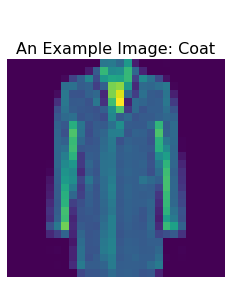

In [3]:
def show(idx, title):
    plt.figure()
    plt.imshow(test_images[idx].reshape(28,28))
    plt.axis('off')
    plt.title('\n\n{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0,len(test_images)-1)
show(rando, 'An Example Image: {}'.format(class_names[test_labels[rando]]))

In [11]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


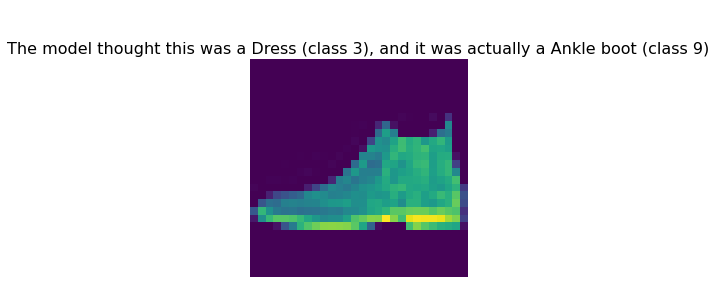

In [12]:
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8510/v1/models/random_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_labels[0]], test_labels[0]))

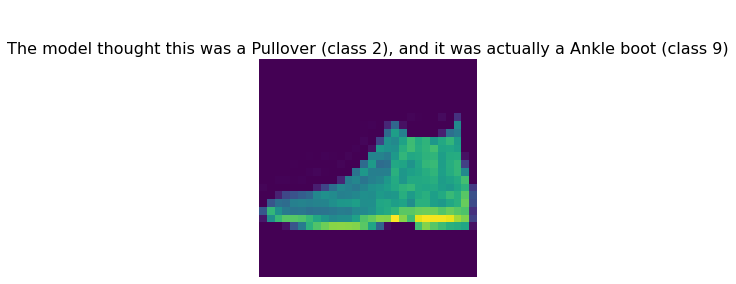

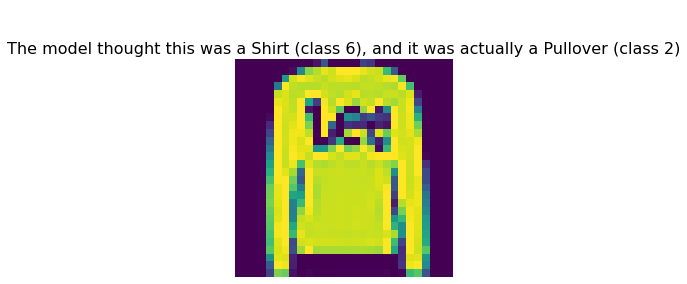

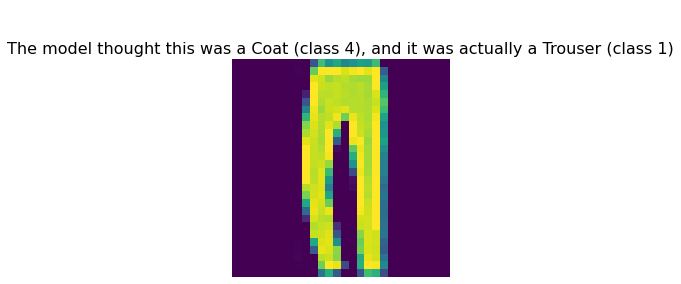

In [6]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8510/v1/models/random_model/versions/1:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

for i in range(0,3):
  show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
    class_names[np.argmax(predictions[i])], np.argmax(predictions[i]), class_names[test_labels[i]], test_labels[i]))

In [7]:
json.loads(json_response.text)

{'predictions': [[0.042338416,
   0.282380193,
   0.29117018,
   -0.128007114,
   0.163520217,
   0.0521736518,
   -0.0282262079,
   -0.0398204476,
   -0.0388575345,
   -0.792301416],
  [-0.61592871,
   -0.088246,
   0.0702090263,
   0.0949368328,
   0.58049047,
   0.243097723,
   1.12270069,
   -0.484955192,
   -0.285674125,
   -1.13628542],
  [-0.357848495,
   0.137567744,
   -0.0199025683,
   -0.174600407,
   0.571287155,
   0.136958912,
   0.486429781,
   -0.954990745,
   -0.18716678,
   -0.212156758]]}